#  Dimensionality reduction and Visualization     

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df1=pd.read_csv('Normal_Bearing.csv')
df2=pd.read_csv('outer_race_fault_test_2.csv')
df3=pd.read_csv('outer_race_fault_test_3.csv')
df4=pd.read_csv('inner_race_fault.csv')
df5=pd.read_csv('roller_element_fault.csv')

df = pd.concat([df1,df2,df3,df4,df5])
df = df.reset_index(drop=True)
df

,Max,Min,Mean,Std,RMS,Skewness,Kurtosis,Crest Factor,Form Factor,Fault
0,0.422,-0.657,-0.117744,0.093095,0.150100,-0.033307,0.876667,2.811460,-1.274798,Normal
1,0.466,-0.605,-0.116695,0.091405,0.148230,0.022064,0.946745,3.143757,-1.270240,Normal
2,0.356,-0.713,-0.117174,0.094340,0.150430,-0.088984,0.858388,2.366546,-1.283821,Normal
3,0.500,-0.647,-0.117876,0.093033,0.150165,-0.036459,0.957214,3.329671,-1.273921,Normal
4,0.479,-0.659,-0.116594,0.093409,0.149395,-0.002756,1.290804,3.206260,-1.281329,Normal
...,...,...,...,...,...,...,...,...,...,...
2273,0.701,-0.764,-0.114628,0.131560,0.174490,0.134774,1.459441,4.017426,-1.522231,Roller Element
2274,0.571,-0.667,-0.114702,0.126378,0.170667,0.071571,1.195710,3.345699,-1.487915,Roller Element
2275,0.623,-0.708,-0.114239,0.126722,0.170611,0.100394,1.255684,3.651572,-1.493457,Roller Element
2276,0.752,-0.686,-0.114455,0.128396,0.172002,0.086076,1.189483,4.372047,-1.502786,Roller Element


In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# PCA with TWO Principal Components

In [4]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
X_pca = pca_2.fit_transform(X)

principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])

principalDf['Fault']=np.array(df['Fault'])

In [5]:
principalDf

,principal component 1,principal component 2,Fault
0,0.497361,0.161289,Normal
1,0.512661,-0.003032,Normal
2,0.532831,0.335156,Normal
3,0.355761,0.043435,Normal
4,0.394038,0.022879,Normal
...,...,...,...
2273,-0.334603,0.321225,Roller Element
2274,-0.022924,0.465323,Roller Element
2275,-0.123683,0.366959,Roller Element
2276,-0.349879,0.247129,Roller Element


In [6]:
principalDf['Fault'].unique()

array(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'],
      dtype=object)

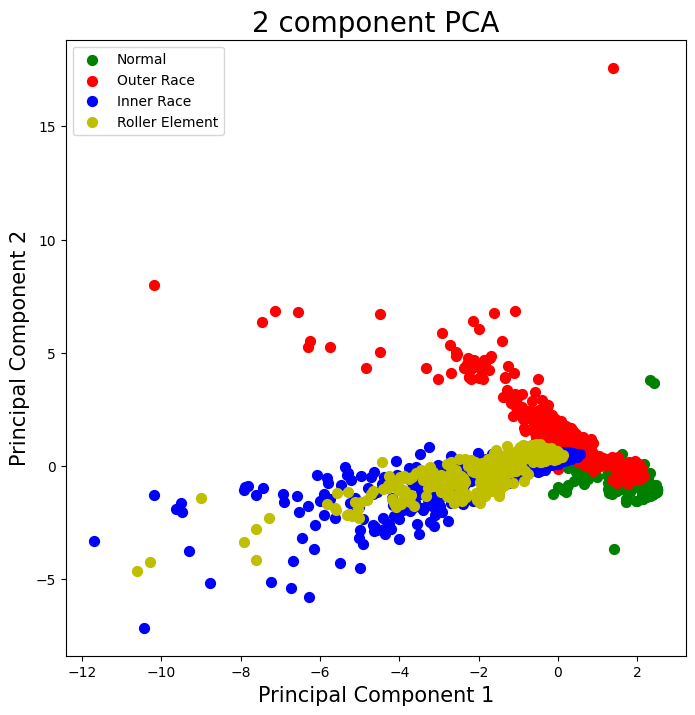

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
fault = ['Normal', 'Outer Race', 'Inner Race', 'Roller Element']
colors = ['g', 'r','b','y']
for fault, color in zip(fault,colors):
    indicesToKeep = principalDf['Fault'] == fault
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'])


In [8]:
sum(pca_2.explained_variance_ratio_)
pca_2.explained_variance_ratio_

array([0.47683195, 0.18028771])

# PCA with THREE Principal Components

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:

X = StandardScaler().fit_transform(X)

pca_3 = PCA(n_components=3)

X_pca = pca_3.fit_transform(X)

principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2','principal component 3'])

principalDf['Fault']=np.array(df['Fault'])

In [11]:
principalDf

,principal component 1,principal component 2,principal component 3,Fault
0,0.497361,0.161289,1.545771,Normal
1,0.512661,-0.003032,1.437239,Normal
2,0.532831,0.335156,1.659098,Normal
3,0.355761,0.043435,1.421564,Normal
4,0.394038,0.022879,1.418665,Normal
...,...,...,...,...
2273,-0.334603,0.321225,1.191201,Roller Element
2274,-0.022924,0.465323,1.374265,Roller Element
2275,-0.123683,0.366959,1.285745,Roller Element
2276,-0.349879,0.247129,1.115728,Roller Element


In [12]:
%pip install PyQt5
%matplotlib qt

fig = plt.figure(figsize=(10,14))
  
# syntax for 3-D projection
ax = plt.axes(projection='3d')
  
# defining all 3 axes
fault = ['Normal', 'Outer Race', 'Inner Race', 'Roller Element']
colors = ['g', 'r','b','y']
for fault, color in zip(fault,colors):
    indicesToKeep = principalDf['Fault'] == fault
    ax.scatter3D(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , principalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(['Normal', 'Outer Race', 'Inner Race', 'Roller Element'])

  
# plotting
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3D PCA')
ax.view_init(45,90)

plt.show()


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [14]:
np.sum(pca_3.explained_variance_ratio_)
#pca.explained_variance_ratio_

np.float64(0.8029818333391043)